In [1]:
import tensorflow as tf
import keras 
import cv2 as cv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_test.shape,y_test.shape


((10000, 28, 28, 1), (10000, 10))

In [3]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [4]:
model = keras.models.Sequential([
        keras.layers.Conv2D(filters=32,kernel_size=(3,3)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=32,kernel_size=(3,3)),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(10,activation='softmax')

])

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [6]:
model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - acc: 0.8667 - loss: 0.5314 - val_acc: 0.9424 - val_loss: 0.2147
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - acc: 0.9534 - loss: 0.1638 - val_acc: 0.9580 - val_loss: 0.1520
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - acc: 0.9667 - loss: 0.1152 - val_acc: 0.9620 - val_loss: 0.1280
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - acc: 0.9719 - loss: 0.0903 - val_acc: 0.9651 - val_loss: 0.1202
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - acc: 0.9764 - loss: 0.0774 - val_acc: 0.9681 - val_loss: 0.1139
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - acc: 0.9806 - loss: 0.0608 - val_acc: 0.9627 - val_loss: 0.1379
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - acc: 0.9833 - loss: 0.0513 - val_acc: 0.9647 - val_loss: 0.1325
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - acc: 0.9839 - loss: 0.0485 - val_acc: 0.9623 - val_loss: 0.1560
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 

In [7]:
y_hat = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [8]:
loss , acc = model.evaluate(x_test,y_test)
print('loss = ',loss)
print('accuracy = ',acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9604 - loss: 0.1790
loss =  0.14579837024211884
accuracy =  0.9661999940872192


<Axes: >

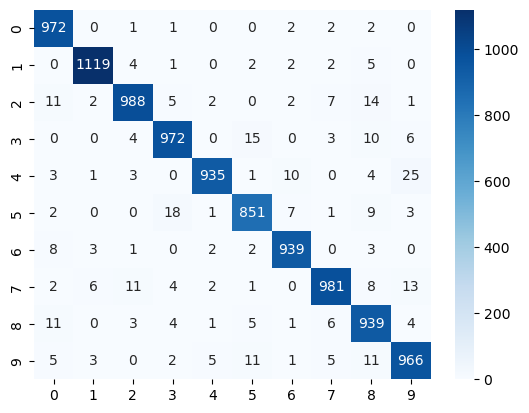

In [9]:
cm = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_hat,axis=1))

sns.heatmap(cm,annot=True,fmt='d', cmap='Blues')

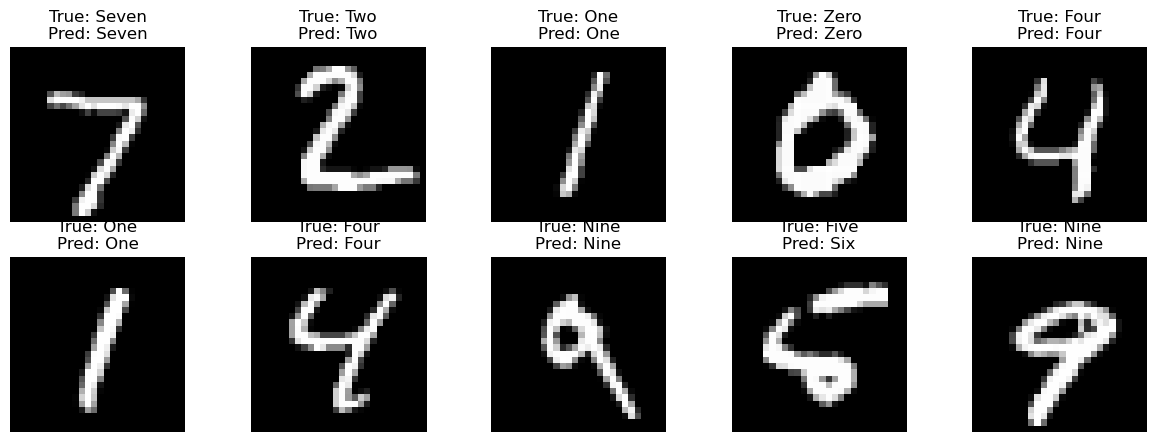

In [10]:
num_images = 10
images = x_test

class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Convert one-hot encoded labels back to integers
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(y_hat, axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i],cmap='gray')
    plt.title(f'True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}')
    plt.axis('off')

plt.show()
